In [108]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgbm
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
def mape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    z = np.mean(np.abs((y_true-y_pred)/y_true))
    return z
from sklearn.metrics import make_scorer, silhouette_score
mapes = make_scorer(mape)
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, IsolationForest, VotingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor,LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import PolynomialFeatures, RobustScaler,StandardScaler,PowerTransformer,QuantileTransformer,MinMaxScaler, LabelEncoder,OneHotEncoder, FunctionTransformer, quantile_transform, power_transform
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import normaltest, zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, RANSACRegressor, BayesianRidge, LassoCV, ElasticNetCV, LassoLarsCV, OrthogonalMatchingPursuitCV, OrthogonalMatchingPursuit,RidgeCV,LassoLars
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.covariance import EllipticEnvelope
from sklearn.manifold import TSNE
from sklearn.pipeline import FeatureUnion
import catboost as cb
from sklearn.svm import SVR, OneClassSVM
from sklearn.base import TransformerMixin
from sklearn.decomposition import KernelPCA
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import SelectFromModel,mutual_info_regression
from sklearn.model_selection import KFold

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [10]:
data_train_x = data_train.iloc[:,2:]
data_train_y = data_train.iloc[:,1]
cat_feature = data_train_x.iloc[:,:10]
num_feature = data_train_x.iloc[:,10:]
data_test_x = data_test.iloc[:,1:]
cat_feature_col = cat_feature.columns
num_feature_col = num_feature.columns

In [46]:
col_want = ['Cat_02','Cat_03', 'Col_0225', 'Col_0443', 'Col_0717', 'Col_0720', 'Col_0816',
       'Col_0871', 'Col_1044', 'Col_1058', 'Col_1072', 'Col_1845', 'Col_1939',
       'Col_2280', 'Col_2643', 'Col_2723', 'Col_2895', 'Col_2969', 'Col_3202',
       'Col_3631', 'Col_3875', 'Col_4181']
data_train_x_want = data_train_x[col_want]
cat_feature_want = col_want[:2]
num_feature_want = col_want[2:]

In [122]:
col_want = ['Cat_02','Cat_04',
            'Col_0005', 'Col_0248', 'Col_0271', 'Col_0380', 'Col_0590',
       'Col_0592', 'Col_0685', 'Col_0695', 'Col_0712', 'Col_0717', 'Col_0720',
       'Col_0804', 'Col_0816', 'Col_1002', 'Col_1044', 'Col_1058', 'Col_1078',
       'Col_1091', 'Col_1135', 'Col_1188', 'Col_1315', 'Col_1485', 'Col_1683',
       'Col_1845', 'Col_1939', 'Col_2175', 'Col_2581', 'Col_2643', 'Col_2969',
       'Col_3080', 'Col_3166', 'Col_3841', 'Col_3848', 'Col_3867', 'Col_3871',
       'Col_3874', 'Col_3875', 'Col_3970', 'Col_4181', 'Col_0443',
       'Col_0566', 'Col_0606',
       'Col_0739', 'Col_0855', 'Col_0871',
       'Col_0921', 'Col_1121', 'Col_1182',
       'Col_1196', 'Col_1265', 'Col_1522',
       'Col_1564', 'Col_1636', 'Col_1772',
       'Col_1912', 'Col_1978', 'Col_2041',
       'Col_2046', 'Col_2280', 'Col_2570',
       'Col_2723', 'Col_2730', 'Col_2841',
       'Col_2985', 'Col_3202', 'Col_3234',
       'Col_3342', 'Col_3396', 'Col_3459',
       'Col_3631', 'Col_3696', 'Col_3704',
       'Col_4026', 'Col_4109', 'Col_4160', 'Col_0225']
data_train_x_want = data_train_x[col_want]
cat_feature_want = col_want[:2]
num_feature_want = col_want[2:]
data_private_x_want = data_test_x[col_want]

In [75]:
data_train_x_want

Cat_02 Cat_04      Col_0005    Col_0248  Col_0271  Col_0380     Col_0590  \
0        D      A  1.799931e+13   -2.176329  1.197904  0.000857  3499.580438   
1        B      B  6.074453e+12   -6.507007       NaN -0.000269    62.086368   
2        A      C -3.403536e+12   -0.069459  0.535571 -0.000324    53.877992   
3        C      A  1.245216e+13   -3.743544  2.017211  0.001404   -66.731500   
4        D      C  9.561847e+12    4.286672  1.873972 -0.000103  2625.087071   
..     ...    ...           ...         ...       ...       ...          ...   
243      A      D  1.402434e+13    5.401405  2.803220  0.000980    96.129463   
244      A      C  1.445061e+13   85.526123  2.202870  0.028630   742.687996   
245    NaN      A  6.889512e+12  345.541729  0.480034  0.115046    79.244369   
246      B      C  1.008632e+13    1.629100  1.059857 -0.000831    55.637957   
247      D      D  1.570503e+13   -6.958333  1.449626 -0.000694   -27.561085   

      Col_0592  Col_0685  Col_0695  ...  Col_3342    Col_3396      Col_3459  \
0    -3.623585  2.422947  1.619791  ...  4.944434  132.175309  11446.000458   
1     0.525217  0.468741 -0.071768  ...  4.949127 -516.978820  11488.921810   
2     0.816447       NaN  1.845198  ...  4.977338   52.708162           NaN   
3    -4.000406  1.846689       NaN  ...  4.958480 -570.125175  11440.045964   
4    15.586848  0.923439  0.665597  ...  4.956111  384.398671  11552.397379   
..         ...       ...       ...  ...       ...         ...           ...   
243   2.091934  0.794981  0.987576  ...  4.970822   87.731278  11497.550265   
244  -6.993379  1.864646       NaN  ...  4.939843   81.335999  11447.924368   
245 -15.130421  2.072967  2.101641  ...  4.913481         NaN  11520.186326   
246 -20.907760  1.710185  1.591277  ...       NaN -304.477537  11523.145738   
247  -3.635537  0.757364 -0.061379  ...  4.999998  370.756014  11455.480920   

      Col_3631  Col_3696    Col_3704   Col_4026  Col_4109  Col_4160  Col_0225  
0          NaN  2.079750  109.910329   0.918095 -1.287277  0.004959  0.002051  
1    33.436815  1.952422  113.008384  -0.617245 -0.959368  0.003199 -0.001045  
2    37.781030  2.268072  105.602069  -0.263683 -1.315896  0.005415 -0.000068  
3    35.902536  2.201689  147.404340   1.309112 -1.406724  0.001685 -0.000264  
4    38.475434  2.614566  132.451886  -0.205560 -0.986824  0.001613  0.000443  
..         ...       ...         ...        ...       ...       ...       ...  
243  36.331660  2.415658  122.685471  26.279034       NaN  0.000158  0.000197  
244  38.286639  1.328184  114.953860  -3.580749 -0.816828 -0.000619  0.030072  
245  35.882398  1.987589  153.059055  -0.074048 -1.504760  0.003994  0.115293  
246  36.840307       NaN  100.443021  28.596704 -1.407494 -0.000519 -0.001482  
247        NaN  1.552334  104.645993  21.394304 -1.679081  0.003044       NaN  

[248 rows x 78 columns]

In [59]:
#############################add columns names(constant,want)################################
cat_pre_col = []
for i, col in enumerate(cat_feature_want):
    for j in range(data_train_x[col].nunique()+1):
        name = col+'_'+str(j)
        cat_pre_col.append(name)

for i, col in enumerate(cat_feature_want):
    for j in range(2):
        name = col+'_addindi'+str(j)
        cat_pre_col.append(name)
        
num_pre_col = num_feature_want.copy()
for i, col in enumerate(num_feature_want):
    name = col+'_addindi'
    num_pre_col.append(name)
    
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',IterativeImputer(estimator=BayesianRidge(),add_indicator=True,max_iter=50,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
])
x_add = pd.DataFrame(pipe.fit_transform(data_train_x_want))
x_add.columns = cat_pre_col+num_pre_col

[IterativeImputer] Completing matrix with shape (248, 76)
[IterativeImputer] Ending imputation round 1/50, elapsed time 1.11
[IterativeImputer] Change: 6.255931778051166, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 2/50, elapsed time 2.18
[IterativeImputer] Change: 1.2860961443863144, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 3/50, elapsed time 3.10
[IterativeImputer] Change: 0.21109517110640394, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 4/50, elapsed time 3.69
[IterativeImputer] Change: 0.1519989215662308, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 5/50, elapsed time 4.78
[IterativeImputer] Change: 0.12637435227955082, scaled tolerance: 0.012261331398071106 
[IterativeImputer] Ending imputation round 6/50, elapsed time 5.89
[IterativeImputer] Change: 0.10353112476804785, scaled tolerance: 0.012261331398071106 
[IterativeImpute

In [76]:
x_add

Cat_02_0  Cat_02_1  Cat_02_2  Cat_02_3  Cat_02_4  Cat_04_0  Cat_04_1  \
0         0.0       0.0       0.0       1.0       0.0       1.0       0.0   
1         0.0       1.0       0.0       0.0       0.0       0.0       1.0   
2         1.0       0.0       0.0       0.0       0.0       0.0       0.0   
3         0.0       0.0       1.0       0.0       0.0       1.0       0.0   
4         0.0       0.0       0.0       1.0       0.0       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
243       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
244       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
245       0.0       0.0       0.0       0.0       1.0       1.0       0.0   
246       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
247       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

     Cat_04_2  Cat_04_3  Cat_04_4  ...  Col_3342_addindi  Col_3396_addindi  \
0         0.0       0.0       0.0  ...               0.0               0.0   
1         0.0       0.0       0.0  ...               0.0               0.0   
2         1.0       0.0       0.0  ...               0.0               0.0   
3         0.0       0.0       0.0  ...               0.0               0.0   
4         1.0       0.0       0.0  ...               0.0               0.0   
..        ...       ...       ...  ...               ...               ...   
243       0.0       1.0       0.0  ...               0.0               0.0   
244       1.0       0.0       0.0  ...               0.0               0.0   
245       0.0       0.0       0.0  ...               0.0               1.0   
246       1.0       0.0       0.0  ...               1.0               0.0   
247       0.0       1.0       0.0  ...               0.0               0.0   

     Col_3459_addindi  Col_3631_addindi  Col_3696_addindi  Col_3704_addindi  \
0                 0.0               1.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 1.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
243               0.0               0.0               0.0               0.0   
244               0.0               0.0               0.0               0.0   
245               0.0               0.0               0.0               0.0   
246               0.0               0.0               1.0               0.0   
247               0.0               1.0               0.0               0.0   

     Col_4026_addindi  Col_4109_addindi  Col_4160_addindi  Col_0225_addindi  
0                 0.0               0.0               0.0               0.0  
1                 0.0               0.0               0.0               0.0  
2                 0.0               0.0               0.0               0.0  
3                 0.0               0.0               0.0               0.0  
4                 0.0               0.0               0.0               0.0  
..                ...               ...               ...               ...  
243               0.0               1.0               0.0               0.0  
244               0.0               0.0               0.0               0.0  
245               0.0               0.0               0.0               0.0  
246               0.0               0.0               0.0               0.0  
247               0.0               0.0               0.0               1.0  

[248 rows x 166 columns]

In [61]:
##############################add poly columns names################################
pf = PolynomialFeatures(2)
x_add_sel_poly = pd.DataFrame(pf.fit_transform(x_add))
x_add_sel_poly.columns = pf.get_feature_names(x_add.columns)

In [62]:
x_add_sel_poly.loc[:,['Cat_02_3','Col_0720','Col_1939','Col_2643','Col_3875','Col_4181','Cat_02_3 Col_1044','Col_0816^2','Col_1044 Col_2643',
              'Col_1845_addindi Col_3202_addindi','Col_0871_addindi Col_3631_addindi']]

Cat_02_3  Col_0720  Col_1939  Col_2643  Col_3875  Col_4181  \
0         1.0  0.326576  0.065622 -3.264159  0.717229  1.595050   
1         0.0 -2.093750 -0.362843  0.450206 -1.360040  0.280216   
2         0.0  0.066697 -0.382692 -0.207972  1.146231  0.832101   
3         0.0  0.550222  1.450006 -2.435764  0.494012  0.313436   
4         1.0 -2.092028 -0.338776 -0.501673 -1.139194  0.101854   
..        ...       ...       ...       ...       ...       ...   
243       0.0 -0.761950  1.354431  0.952418 -0.732715 -0.862053   
244       0.0 -2.112478 -1.161477  0.045418  0.440077 -1.030179   
245       0.0  0.785198 -0.728514  0.647639  0.244529  0.498534   
246       0.0  0.608418  0.536052  0.495921  1.472987  0.681766   
247       1.0  0.298310 -0.272440  0.171447  1.310062 -0.211283   

     Cat_02_3 Col_1044  Col_0816^2  Col_1044 Col_2643  \
0            -1.128850    0.049346           3.684747   
1            -0.000000    0.000139          -0.445719   
2             0.000000    0.070576          -0.065472   
3            -0.000000    0.112028           2.440841   
4             0.848966    0.048829          -0.425903   
..                 ...         ...                ...   
243          -0.000000    0.019015          -0.491109   
244          -0.000000    0.874102          -0.049434   
245          -0.000000   19.023645          -0.209440   
246          -0.000000    0.177234          -0.109186   
247           1.848614    0.115515           0.316938   

     Col_1845_addindi Col_3202_addindi  Col_0871_addindi Col_3631_addindi  
0                                  0.0                                1.0  
1                                  0.0                                0.0  
2                                  0.0                                0.0  
3                                  0.0                                0.0  
4                                  0.0                                0.0  
..                                 ...                                ...  
243                                0.0                                0.0  
244                                0.0                                0.0  
245                                0.0                                0.0  
246                                0.0                                0.0  
247                                0.0                                0.0  

[248 rows x 11 columns]

In [63]:
want = [x_add_sel_poly.columns.get_loc(i) for i in ['Cat_02_3','Col_0720','Col_1939','Col_2643','Col_3875','Col_4181','Cat_02_3 Col_1044','Col_0816^2','Col_1044 Col_2643',
              'Col_1845_addindi Col_3202_addindi','Col_0871_addindi Col_3631_addindi']]

In [64]:
want

[4, 25, 39, 42, 51, 53, 687, 4158, 4450, 12638, 13525]

In [ ]:
for i in range(2,data_train_x_want.shape[1]):
    plt.figure()
    plt.hist(data_train_x_want.iloc[:,i])
    plt.title(data_train_x_want.columns[i])

In [68]:
##############################lasso sel poly2 omp cv################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))#6
    #('imputer',IterativeImputer(estimator=LassoLars(),max_iter=50,sample_posterior=False,add_indicator=True,verbose=3))
])

preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_col),
    ('num',num_transform,num_feature_col)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select_lassolars',SelectFromModel(LassoLars(alpha=0.048))),
    ('polyfeature',polyfeature),
    ('omp',LinearRegression())
])
cvsmape = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring=mapes)
#cvsmse = cross_val_score(pipe,data_train_x_want,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
#print(-cvsmse.mean(),cvsmse.std())

KeyboardInterrupt: 

In [183]:
##############################K fold loop to check omp################################
kf = KFold(10)
msel = []
mapel = []
modellist = []
predlist = []
for train_index, test_index in kf.split(data_train_x):
    X_train, X_test, y_train, y_test = data_train_x.iloc[train_index], data_train_x.iloc[test_index],data_train_y.iloc[train_index], data_train_y.iloc[test_index]
    cat_transform = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
        ('scalar',OneHotEncoder(sparse=False)),
    ])
    num_transform = Pipeline(steps=[
        ('scalar',StandardScaler()),
        ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
        #('imputer',IterativeImputer(estimator=BayesianRidge(),add_indicator=True,max_iter=50,verbose=3))
    ])
    preprocess = ColumnTransformer(
    transformers=[
        ('cat',cat_transform,cat_feature_col),
        ('num',num_transform,num_feature_col)
    ])

    polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])

    pipe = Pipeline(steps=[
        ('preprocess',preprocess),
        ('ll',SelectFromModel(LassoLarsCV(cv=10))),
        ('polyfeature',polyfeature),
        ('omp',SelectFromModel(OrthogonalMatchingPursuit(n_nonzero_coefs=11)))
    ])
    X_train = pipe.fit_transform(X_train,y_train)
    X_test = pipe.transform(X_test)
    model = RidgeCV(cv=10)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mapee = mape(y_test,y_pred)
    msel.append(mse)
    mapel.append(mapee)
    modellist.append(model)
    X_private = pipe.transform(data_test_x)
    y_pred_private = model.predict(X_private)
    predlist.append(y_pred_private)
    print('MSE: %.f, MAPE: %.4f, Score: %.4f' %(mse,mapee,1-mapee))
    
print((1-np.array(mapel)).mean())
print(np.array(msel).mean())
# er = VotingRegressor([('1',pipe),
#                       #('2',pipe2),
#                       #('3',pipe3),
# ])
# cvsmape = cross_val_score(er,data_train_x_want,data_train_y,cv=10,scoring=mapes)
# # cvsmse = cross_val_score(er,data_train_x_want,data_train_y,cv=10,scoring='neg_mean_squared_error')
# print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
# # print(-cvsmse.mean(),cvsmse.std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 35 iterations, i.e. alpha=1.017e-01, with an active set of 35 regressors, and the smallest cholesky pivot element being 5.576e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 60 iterations, i.e. alpha=8.024e-02, with an active set of 58 regressors, and the smallest cholesky pivot element being 5.576e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 107 iterations, i.e. alpha=5.083e-02, with an active set of 97 regressors, and the smallest cholesky pivot e

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 267 iterations, alpha=1.370e-02, previous alpha=1.368e-02, with an active set of 170 regressors.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 111 iterations, i.e. alpha=5.222e-02, with an active set of 101 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 127 iterations, i.e. alpha=4.688e-02, with an active set of 111 regressors, and the smallest cholesky pivot element being 4.215e-08.

MSE: 33, MAPE: 0.0098, Score: 0.9902


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 98 iterations, i.e. alpha=5.972e-02, with an active set of 88 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 99 iterations, i.e. alpha=5.971e-02, with an active set of 89 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 99 iterations, i.e. alpha=5.971e-02, with an active set of 89 regressors, and the smallest cholesky pivot el

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 209 iterations, i.e. alpha=2.513e-02, with an active set of 165 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 263 iterations, i.e. alpha=2.154e-02, with an active set of 169 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 287 iterations, alpha=1.992e-02, previous alpha=1.99

MSE: 42, MAPE: 0.0130, Score: 0.9870


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 56 iterations, i.e. alpha=8.059e-02, with an active set of 52 regressors, and the smallest cholesky pivot element being 7.451e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 113 iterations, i.e. alpha=4.531e-02, with an active set of 103 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 168 iterations, i.e. alpha=2.292e-02, with an active set of 134 regressors, and the smallest cholesky pivo

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 41 iterations, i.e. alpha=1.005e-01, with an active set of 39 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 43 iterations, i.e. alpha=9.778e-02, with an active set of 41 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 108 iterations, i.e. alpha=5.142e-02, with an active set of 102 regressors, and the smallest cholesky pivot 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 81 iterations, i.e. alpha=7.008e-02, with an active set of 71 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 108 iterations, i.e. alpha=5.277e-02, with an active set of 90 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 109 iterations, i.e. alpha=5.275e-02, with an active set of 91 regressors, and the smallest cholesky pivot 

MSE: 27, MAPE: 0.0099, Score: 0.9901


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=1.071e-01, with an active set of 27 regressors, and the smallest cholesky pivot element being 6.664e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 57 iterations, i.e. alpha=7.786e-02, with an active set of 51 regressors, and the smallest cholesky pivot element being 4.712e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 103 iterations, i.e. alpha=5.799e-02, with an active set of 83 regressors, and the smallest cholesky pivot e

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 279 iterations, i.e. alpha=3.625e-03, with an active set of 193 regressors, and the smallest cholesky pivot element being 9.064e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 287 iterations, i.e. alpha=2.995e-03, with an active set of 195 regressors, and the smallest cholesky pivot element being 3.495e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 288 iterations, i.e. alpha=2.994e-03, with an active set of 196 regressors, and the smallest cholesky pi

MSE: 51, MAPE: 0.0135, Score: 0.9865


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 102 iterations, i.e. alpha=5.243e-02, with an active set of 92 regressors, and the smallest cholesky pivot element being 2.788e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 137 iterations, i.e. alpha=3.639e-02, with an active set of 119 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 146 iterations, i.e. alpha=3.052e-02, with an active set of 124 regressors, and the smallest cholesky piv

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 122 iterations, i.e. alpha=3.284e-02, with an active set of 114 regressors, and the smallest cholesky pivot element being 7.743e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 160 iterations, i.e. alpha=2.029e-02, with an active set of 144 regressors, and the smallest cholesky pivot element being 4.470e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 205 iterations, i.e. alpha=1.111e-02, with an active set of 169 regressors, and the smallest cholesky pi

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 186 iterations, i.e. alpha=2.547e-02, with an active set of 152 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 219 iterations, i.e. alpha=1.801e-02, with an active set of 171 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 304 iterations, alpha=1.295e-02, previous alpha=1.29

MSE: 8, MAPE: 0.0059, Score: 0.9941


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 229 iterations, i.e. alpha=1.229e-02, with an active set of 173 regressors, and the smallest cholesky pivot element being 6.829e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 235 iterations, i.e. alpha=1.123e-02, with an active set of 177 regressors, and the smallest cholesky pivot element being 3.942e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 235 iterations, i.e. alpha=1.123e-02, with an active set of 177 regressors, and the smallest cholesky pi

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 247 iterations, i.e. alpha=1.001e-02, with an active set of 175 regressors, and the smallest cholesky pivot element being 4.470e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 262 iterations, alpha=9.371e-03, previous alpha=9.367e-03, with an active set of 179 regressors.
  ConvergenceWarning)


MSE: 30, MAPE: 0.0097, Score: 0.9903


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 55 iterations, i.e. alpha=8.091e-02, with an active set of 49 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 140 iterations, i.e. alpha=4.046e-02, with an active set of 118 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 140 iterations, i.e. alpha=4.044e-02, with an active set of 118 regressors, and the smallest cholesky pivo

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 105 iterations, i.e. alpha=5.642e-02, with an active set of 95 regressors, and the smallest cholesky pivot element being 3.161e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 135 iterations, i.e. alpha=4.015e-02, with an active set of 119 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 135 iterations, i.e. alpha=4.012e-02, with an active set of 119 regressors, and the smallest cholesky piv

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 164 iterations, i.e. alpha=3.509e-02, with an active set of 122 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 219 iterations, i.e. alpha=2.126e-02, with an active set of 159 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 229 iterations, alpha=2.083e-02, previous alpha=2.08

MSE: 24, MAPE: 0.0087, Score: 0.9913


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 68 iterations, i.e. alpha=7.764e-02, with an active set of 60 regressors, and the smallest cholesky pivot element being 6.989e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 70 iterations, i.e. alpha=7.696e-02, with an active set of 62 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 168 iterations, i.e. alpha=3.597e-02, with an active set of 124 regressors, and the smallest cholesky pivot 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 98 iterations, i.e. alpha=5.192e-02, with an active set of 84 regressors, and the smallest cholesky pivot element being 3.942e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 159 iterations, i.e. alpha=2.596e-02, with an active set of 133 regressors, and the smallest cholesky pivot element being 4.470e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 171 iterations, alpha=2.294e-02, previous alpha=2.293e

MSE: 28, MAPE: 0.0101, Score: 0.9899


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 39 iterations, i.e. alpha=1.032e-01, with an active set of 33 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 92 iterations, i.e. alpha=5.736e-02, with an active set of 80 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 107 iterations, i.e. alpha=5.155e-02, with an active set of 95 regressors, and the smallest cholesky pivot e

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 152 iterations, i.e. alpha=3.075e-02, with an active set of 126 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 250 iterations, alpha=2.417e-02, previous alpha=2.416e-02, with an active set of 149 regressors.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 103 iterations, i.e. alpha=5.923e-02, with an active set of 97 regressors, and the smallest cholesky pivot element being 7.300e-08. 

MSE: 90, MAPE: 0.0156, Score: 0.9844


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=6.057e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 4.470e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 88 iterations, i.e. alpha=6.056e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:608: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 94 iterations, alpha=5.790e-02, previous alpha=5.777e-02

MSE: 97, MAPE: 0.0177, Score: 0.9823
0.9886130865070923
43.14820886190903


In [165]:
1-np.array(mapel)

array([0.99098958, 0.99059198, 0.99070027, 0.98788552, 0.9930553 ,
       0.9885891 , 0.99144679, 0.98857475, 0.98328849, 0.98620653])

In [151]:
1-np.array(mapel)

array([0.99153189, 0.98824998, 0.99169438, 0.9887697 , 0.98721709,
       0.99162355, 0.99268545, 0.98907612, 0.9853838 , 0.98888621])

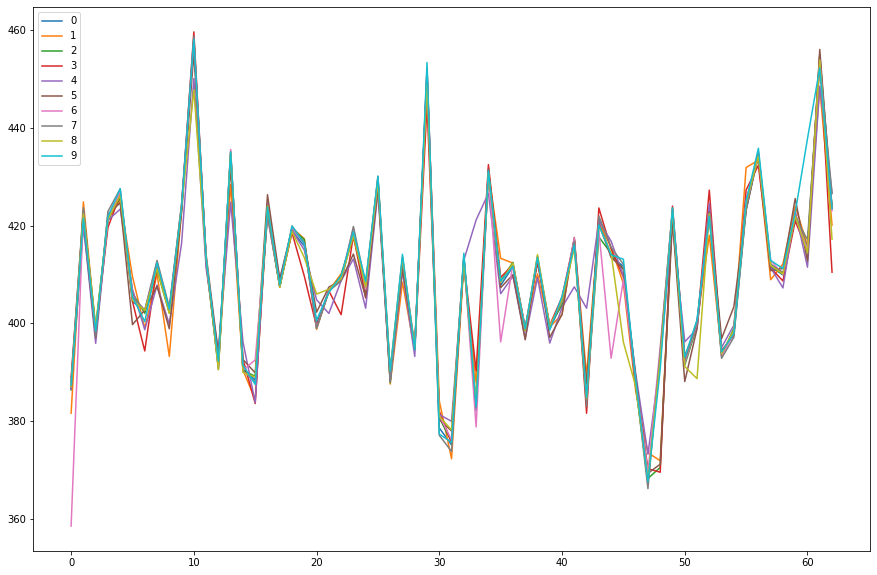

In [146]:
plt.figure(figsize=(15,10))
for i in range(len(predlist)):
    plt.plot(predlist[i],label=i)
plt.legend()

In [162]:
yyBR = pd.DataFrame(predlist)

In [164]:
yyGM = pd.DataFrame(predlist)

In [ ]:
##############################ensemble use lasso+omp sel try impute cv################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=BayesianRidge(),add_indicator=True,max_iter=50,verbose=3))
])
num_transform2 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=GaussianMixture(),add_indicator=True,max_iter=50,verbose=3))
])
num_transform3 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    #('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    ('imputer',IterativeImputer(estimator=KNeighborsRegressor(80),add_indicator=True,max_iter=50,verbose=3))
])
num_transform4 = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))
    #('imputer',IterativeImputer(estimator=SVR(),add_indicator=True,max_iter=50,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform,num_feature_want)
])
preprocess2 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform2,num_feature_want)
])
preprocess3 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform3,num_feature_want)
])
preprocess4 = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_want),
    ('num',num_transform4,num_feature_want)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=3))])

# l = LassoCV(cv=10)
# ll = LassoLarsCV(cv=10)
# rr = RidgeCV(cv=10)
# svr = SVR(kernel='linear')
# omp = OrthogonalMatchingPursuitCV(cv=10)
# xg = xgb.XGBRegressor(objective='reg:squarederror')
# l2 = LassoCV(cv=10)
# stack = StackingRegressor(regressors=(omp,ll,rr,xg,svr,l),
#                            meta_regressor=l2,
#                            verbose=1)

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuit(n_nonzero_coefs=12))
])
pipe2 = Pipeline(steps=[
    ('preprocess',preprocess2),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuit(n_nonzero_coefs=11))
])
pipe3 = Pipeline(steps=[
    ('preprocess',preprocess3),
    ('polyfeature',polyfeature),
    #('stack',stack)
    ('omp',OrthogonalMatchingPursuitCV(cv=10))
])


er = VotingRegressor([('1',pipe),
                      #('2',pipe2),
                      #('3',pipe3),
])
er.fit(data_train_x_want,data_train_y)
y_pred = er.predict(data_test_x)

In [ ]:
pd.Series(er.estimators_[0]['omp'].coef_)[pd.Series(er.estimators_[0]['omp'].coef_)!=0]

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(er.predict(data_train_x_want))
plt.plot(np.array(data_train_y))
1-mape(er.predict(data_train_x_want),data_train_y)

In [ ]:
##############################lasso sel poly2 omp cv################################

cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    #('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))#6
    #('imputer',IterativeImputer(estimator=LassoLars(),max_iter=50,sample_posterior=False,add_indicator=True,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_col),
    ('num',num_transform,num_feature_col)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select_lassolars',SelectFromModel(LassoLars(alpha=0.048))),
    ('polyfeature',polyfeature),
    ('omp',OrthogonalMatchingPursuitCV(cv=10))
])
cvsmape = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring=mapes)
#cvsmse = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
#print(-cvsmse.mean(),cvsmse.std())

In [ ]:
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    #('imputer',SimpleImputer(strategy='constant',add_indicator=True)),
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 6,add_indicator=True))#6
    #('imputer',IterativeImputer(estimator=LassoLars(),max_iter=50,sample_posterior=False,add_indicator=True,verbose=3))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature_col),
    ('num',num_transform,num_feature_col)
])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
])
x_48 = pipe.fit_transform(data_train_x)
model = LassoLars(alpha=0.048)
model.fit(x_48,data_train_y)

In [ ]:
pd.Series(model.coef_)[pd.Series(model.coef_)!=0].to_csv('columns_selected_lassolars_0.048_addindicator_onehot_constant.csv')

In [ ]:
def add_freq_encod(X):
    add_feature = pd.DataFrame()
    for col in cat_feature_col:
        fe = X.groupby(col).size()/len(X)
        add_feature.loc[:,col + '_freq_enocde'] = cat_feature[col].map(fe)
    return add_feature
add_freq_encoder = FunctionTransformer(add_freq_encod)

In [ ]:
class add_cluster(TransformerMixin):
    def __init__(self,model):
        self.model = model
    def fit(self, *args, **kwargs):
        self.model.fit(*args, **kwargs)
        return self
    def transform(self, X, **transform_params):
        return pd.DataFrame(self.model.predict(X))
        #return pd.concat([pd.DataFrame(X),pd.DataFrame(self.model.predict(X))],axis=1,ignore_index=True)

In [ ]:
################################preprocess pipeline#########################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])


In [ ]:
##############################add columns names################################
cat_pre_col = []
for i, col in enumerate(cat_feature_col):
    for j in range(data_test_x[col].nunique()):
        name = col+'_'+str(j)
        cat_pre_col.append(name)

for i, col in enumerate(cat_feature_col):
    for j in range(2):
        name = col+'_addindi'+str(j)
        cat_pre_col.append(name)
        
num_pre_col = num_feature_col.to_list()
for i, col in enumerate(num_feature_col.to_list()):
    name = col+'_addindi'
    num_pre_col.append(name)
    
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
])
x_add = pd.DataFrame(pipe.fit_transform(data_train_x))
x_add.columns = cat_pre_col+num_pre_col

In [ ]:
pd.set_option('display.max_columns', 500)
x_add.iloc[:,sel_mut[sel_mut>0.1].index].columns.tolist()

In [ ]:
##############################add poly columns names################################
sel_la = pd.read_csv('columns_selected_lassolars_addindicator_onehot.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
x_add_sel = x_add.iloc[:,choose_la]
pf = PolynomialFeatures(3)
x_add_sel_poly = pd.DataFrame(pf.fit_transform(x_add_sel))
x_add_sel_poly.columns = pf.get_feature_names(x_add_sel.columns)

In [ ]:
sel_la = pd.read_csv('columns_selected_omp_nonnormalize_addindicator_onehot_poly2_overselected_lassolars.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
x_add_sel_poly.iloc[:,choose_la].columns

In [ ]:
x_add_sel_poly

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(omp_want.predict(x_omp_want))
plt.plot(np.array(data_train_y))
1-mape(omp_want.predict(x_omp_want),data_train_y)

In [ ]:
pd.Series(omp_want.coef_)[pd.Series(omp_want.coef_)!=0]

In [ ]:
##############################try stacking cross validation################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])
sel_la = pd.read_csv('columns_selected_lassolars_addindicator_onehot.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
def feature_select(X):
    return  pd.DataFrame(X).iloc[:,choose_la]
feature_selector = FunctionTransformer(feature_select)
feature_select_process = Pipeline([('feature_select',feature_selector)])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])

l = LassoCV(cv=5)
ll = LassoLarsCV(cv=5)
rr = RidgeCV(cv=5)
omp1 = OrthogonalMatchingPursuitCV(cv=10)
omp2 = OrthogonalMatchingPursuitCV(cv=10)
xg = xgb.XGBRegressor(objective='reg:squarederror')
stack = StackingCVRegressor(regressors=(omp1,ll,rr,l,xg),
                           meta_regressor=omp2,
                           verbose=1)
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select',feature_select_process),
    #('polyfeature',polyfeature),
    #('feature_select_omp',SelectFromModel(OrthogonalMatchingPursuitCV(cv=10))),
    #('xg',xgb.XGBRegressor(objective='reg:squarederror'))
    #('en',ElasticNetCV(cv=10))
    #('RANSAC',RANSACRegressor(min_samples=60))
    #('ridge',RidgeCV(cv=10))
    ('stack',stack)
])

cvsmape = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring=mapes)
#cvsmse = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
#print(-cvsmse.mean(),cvsmse.std())

In [ ]:
##############################try stacking to predict################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])
sel_la = pd.read_csv('columns_selected_lassolars_addindicator_onehot.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
def feature_select(X):
    return  pd.DataFrame(X).iloc[:,choose_la]
feature_selector = FunctionTransformer(feature_select)
feature_select_process = Pipeline([('feature_select',feature_selector)])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select',feature_select_process),
    ('polyfeature',polyfeature),
    ('feature_select_omp',SelectFromModel(OrthogonalMatchingPursuitCV(cv=10))),
])

l = LassoCV(cv=5)
ll = LassoLarsCV(cv=5)
rr = RidgeCV(cv=5)
omp1 = OrthogonalMatchingPursuitCV(cv=10)
omp2 = OrthogonalMatchingPursuitCV(cv=10)
xg = xgb.XGBRegressor(objective='reg:squarederror')
stack = StackingCVRegressor(regressors=(omp1,ll,rr,l,xg),
                           meta_regressor=omp2,
                           verbose=1)

x_stack = pipe.fit_transform(data_train_x,data_train_y)
stack.fit(x_stack,data_train_y)
data_private = pd.read_csv('test.csv')
data_private_x = data_test.iloc[:,1:]
y_pred_stack = stack.predict(pipe.transform(data_private_x))

In [ ]:
x_stack.shape

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(stack.predict(x_stack))
plt.plot(np.array(data_train_y))
1-mape(stack.predict(x_stack),data_train_y)

In [ ]:
sub = pd.read_csv('sample_submission.csv',header=None)
sub[1] = y_pred_stack
sub.to_csv('try_answer_columns_stack_omp_lar_poly_k5.csv',header=None,index=None)

In [ ]:
ac

In [ ]:
##############################model predict################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True))
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])

esemble_regressor = VotingRegressor([#('xgb',xgb.XGBRegressor(objective='reg:squarederror')),
                                     #('et',ExtraTreesRegressor(n_estimators=1000)),
                                     #('rf',RandomForestRegressor(n_estimators=1000)),
                                     #('br',BayesianRidge()),
                                     #('ll',LassoLarsCV(cv=10)),
                                     ('omp',OrthogonalMatchingPursuitCV(cv=10)),
])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
])
x_ompcv = pipe.fit_transform(data_train_x)
model = OrthogonalMatchingPursuitCV(cv=20)
model.fit(x_ompcv,data_train_y)

data_private = pd.read_csv('test.csv')
data_private_x = data_test.iloc[:,1:]
y_pred_ompcv = model.predict(pipe.transform(data_private_x))


In [ ]:
pd.Series(model.coef_)[pd.Series(model.coef_)!=0]

In [ ]:
##############################Try poly features cross validation################################

cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True)),
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])
sel_la = pd.read_csv('columns_selected_lassolars_addindicator_onehot.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
def feature_select(X):
    return  pd.DataFrame(X).iloc[:,choose_la]
feature_selector = FunctionTransformer(feature_select)
feature_select_process = Pipeline([('feature_select',feature_selector)])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
l = LassoCV(cv=5)
ll = LassoLarsCV(cv=5)
rr = RidgeCV(cv=5)
omp1 = OrthogonalMatchingPursuitCV(cv=10)
omp2 = OrthogonalMatchingPursuitCV(cv=10)
xg = xgb.XGBRegressor(objective='reg:squarederror')
stack = StackingCVRegressor(regressors=(omp1,ll,rr,l,xg),
                           meta_regressor=omp2,
                           verbose=1)
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select',feature_select_process),
    ('polyfeature',polyfeature),
    #('ll',LassoLarsCV(cv=5))
    #('en',ElasticNetCV(cv=3,normalize=True))
    #('omp',OrthogonalMatchingPursuitCV(cv=5))
    #('RANSAC',RANSACRegressor(min_samples=60)),
    #('xgb',xgb.XGBRegressor(objective='reg:squarederror'))
    ('stack',stack)
])
cvsmape = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring=mapes)
cvsmse = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
print(-cvsmse.mean(),cvsmse.std())

In [ ]:
pd.DataFrame(x_omp_lar_poly)

In [ ]:
##############################Try poly features to predict################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True)),
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])
sel_la = pd.read_csv('columns_selected_lassolars_addindicator_onehot.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
def feature_select(X):
    return  pd.DataFrame(X).iloc[:,choose_la]
feature_selector = FunctionTransformer(feature_select)
feature_select_process = Pipeline([('feature_select',feature_selector)])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])
pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select',feature_select_process),
    ('polyfeature',polyfeature),
    #('ll',LassoLarsCV(cv=3))
    #('en',ElasticNetCV(cv=3,normalize=True))
    #('omp',OrthogonalMatchingPursuitCV(cv=3))
    #('RANSAC',RANSACRegressor(base_estimator=LassoCV(cv=3),min_samples=60))
])
x_omp_lar_poly = pipe.fit_transform(data_train_x)
model = OrthogonalMatchingPursuitCV(cv=5)
model.fit(x_omp_lar_poly,data_train_y)

data_private = pd.read_csv('test.csv')
data_private_x = data_test.iloc[:,1:]
y_pred_omp_lar_poly = model.predict(pipe.transform(data_private_x))

In [ ]:
model.intercept_

In [ ]:
pd.Series(model.coef_)[pd.Series(model.coef_)!=0]

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(model.predict(x_omp_lar_poly))
plt.plot(np.array(data_train_y))
1-mape(model.predict(x_omp_lar_poly),np.array(data_train_y))

In [ ]:
##############################use omp poly sel to cross validation################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 47,add_indicator=True)),
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])
sel_la = pd.read_csv('columns_selected_lassolars_addindicator_onehot.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
def feature_select(X):
    return  pd.DataFrame(X).iloc[:,choose_la]
feature_selector = FunctionTransformer(feature_select)
feature_select_process = Pipeline([('feature_select',feature_selector)])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])

sel_omp = pd.read_csv('columns_selected_omp_addindicator_onehot_poly2_overselected_lassolars.csv',header=None,index_col=0)[1]
choose_omp = sel_omp.index
def feature_select_omp(X):
    return  pd.DataFrame(X).iloc[:,choose_omp]
feature_selector_omp = FunctionTransformer(feature_select_omp)
feature_select_process_omp = Pipeline([('feature_select',feature_selector_omp)])

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select',feature_select_process),
    ('polyfeature',polyfeature),
    ('feature_select_omp',feature_select_process_omp),
    #('ll',LassoLarsCV(cv=5))
    #('en',ElasticNetCV(cv=3,normalize=True))
    ('omp',OrthogonalMatchingPursuitCV(cv=5))
    #('xg',xgb.XGBRegressor(objective='reg:squarederror',n_estimators=1000))
    #('RANSAC',RANSACRegressor(min_samples=60))
    #('ridge',RidgeCV(alphas=(0.1, 0.5, 1.0, 3, 5, 10.0),cv=10))
    #('rf',RandomForestRegressor())
    
])
cvsmape = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring=mapes)
cvsmse = cross_val_score(pipe,data_train_x,data_train_y,cv=10,scoring='neg_mean_squared_error')
print(cvsmape.mean(),cvsmape.std(),1-cvsmape.mean())
print(-cvsmse.mean(),cvsmse.std())

In [ ]:
##############################use omp poly sel to predict################################
cat_transform = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',add_indicator=True)),
    ('scalar',OneHotEncoder(sparse=False)),
])
num_transform = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('imputer',KNNImputer(n_neighbors = 5,add_indicator=True)),
])
preprocess = ColumnTransformer(
transformers=[
    ('cat',cat_transform,cat_feature.columns),
    ('num',num_transform,num_feature.columns)
])
sel_la = pd.read_csv('columns_selected_lassolars_addindicator_onehot.csv',header=None,index_col=0)[1]
choose_la = sel_la.index
def feature_select(X):
    return  pd.DataFrame(X).iloc[:,choose_la]
feature_selector = FunctionTransformer(feature_select)
feature_select_process = Pipeline([('feature_select',feature_selector)])
polyfeature = Pipeline([('poly',PolynomialFeatures(degree=2))])

sel_omp = pd.read_csv('columns_selected_omp_addindicator_onehot_poly2_overselected_lassolars.csv',header=None,index_col=0)[1]
choose_omp = sel_omp.index
def feature_select_omp(X):
    return  pd.DataFrame(X).iloc[:,choose_omp]
feature_selector_omp = FunctionTransformer(feature_select_omp)
feature_select_process_omp = Pipeline([('feature_select',feature_selector_omp)])

pipe = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_select',feature_select_process),
    ('polyfeature',polyfeature),
    ('feature_select_omp',feature_select_process_omp),
    #('ll',LassoLarsCV(cv=5))
    #('en',ElasticNetCV(cv=3,normalize=True))
    #('omp',OrthogonalMatchingPursuitCV(cv=5))
    #('RANSAC',RANSACRegressor(min_samples=60))
])

x_ridge_omp_lar_poly = pipe.fit_transform(data_train_x)
model = RidgeCV(alphas=(0.1, 0.5, 1.0, 3, 5, 10.0),cv=10)
model.fit(x_ridge_omp_lar_poly,data_train_y)

data_private = pd.read_csv('test.csv')
data_private_x = data_test.iloc[:,1:]
y_pred_ridge_omp_lar_poly = model.predict(pipe.transform(data_private_x))

In [ ]:
pd.Series(model.coef_)[pd.Series(model.coef_)!=0]

In [ ]:
y_pred_ridge_omp_lar_poly

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(model.predict(x_lar_omp_lar_poly))
plt.plot(np.array(data_train_y))
1-mape(model.predict(x_lar_omp_lar_poly),np.array(data_train_y))

In [ ]:
sub = pd.read_csv('sample_submission.csv',header=None)
sub[1] = y_pred_omp_lar_poly
sub.to_csv('try_answer_columns_omp_nonnormalize_lar_poly.csv',header=None,index=None)

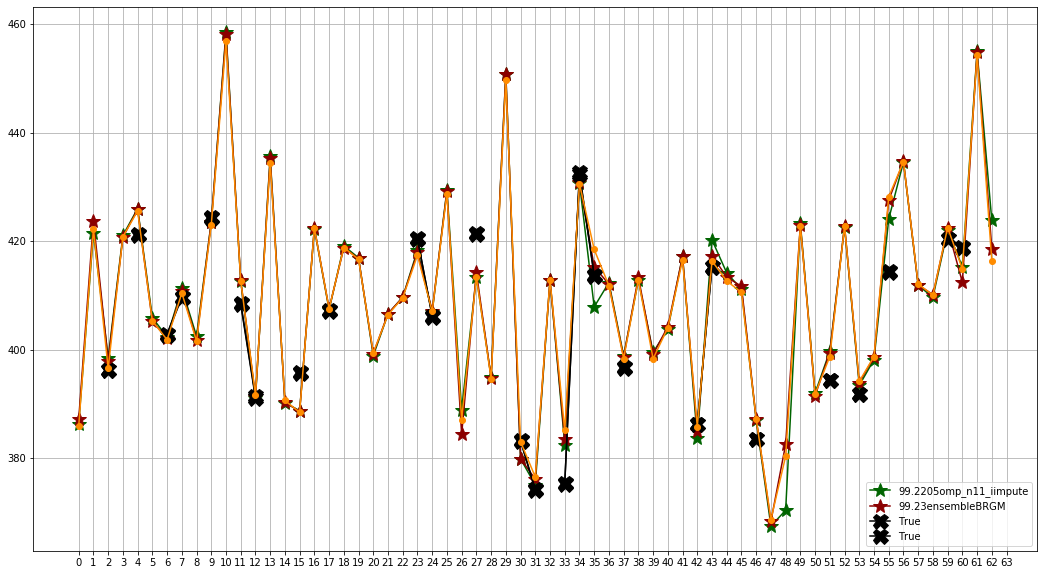

In [179]:
plt.figure(figsize=(18,10))
#plt.plot(pd.read_csv('try_answer_columns_lassolars.csv',header=None)[1],color='c',marker='o',label='98.5104lassolars')
#plt.plot(pd.read_csv('try_answer_columns_omp_lars_poly.csv',header=None)[1],color='c',marker='o',label='99.14omp_lars_poly')
#plt.plot(pd.read_csv('try_answer_columns_omp_nonnormalize_lar_poly.csv',header=None)[1],color='purple',marker='o',label='99.07omp_nonnormal_lars_poly')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_lar_poly.csv',header=None)[1],color='red',marker='*',markersize=15,label='99.14stack')
#plt.plot(pd.read_csv('try_answer_columns_avg_stack_omp_nonnormalize.csv',header=None)[1],color='darkred',marker='*',markersize=15,label='99.15avg_stack_omp_nonnormalize')
#plt.plot(pd.read_csv('try_answer_columns_omp.csv',header=None)[1],color='darkgreen',marker='o',label='98.59omp')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_cv10.csv',header=None)[1],color='darkgreen',marker='o',label='98.98stack_omp_cv10')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_non_cv5.csv',header=None)[1],color='darkgreen',marker='o',label='stack_omp_non_cv5')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_cv248.csv',header=None)[1],color='darkblue',marker='o',label='99.11stack_omp_cv248')
#plt.plot(pd.read_csv('try_answer_columns_stack_omp_non_cv248.csv',header=None)[1],color='darkgreen',marker='o',label='stack_omp_non_cv248')
plt.plot(pd.read_csv('try_answer_columns_omp_n11_iimpute.csv',header=None)[1],color='darkgreen',marker='*',markersize=15,label='99.2205omp_n11_iimpute')
#plt.plot(pd.read_csv('try_answer_columns_omp_cv10_iimpute.csv',header=None)[1],color='darkblue',marker='o',label='99.18omp_cv10_iimpute')
#plt.plot(pd.read_csv('try_answer_columns_omp_n11_ensembleiimpute_constantcat.csv',header=None)[1],color='darkblue',marker='o',label='99.21omp_cv10_iimpute')
plt.plot(pd.read_csv('try_answer_columns_omp_n11_ensembleBRGM.csv',header=None)[1],color='darkred',marker='*',markersize=15,label='99.23ensembleBRGM')
plt.plot(pd.read_csv('To_L4A.csv',header=None)[1],color='black',marker='X',markersize=15,label='True',)
plt.plot(pd.read_csv('To_L6B.csv',header=None)[1],color='black',marker='X',markersize=15,label='True')
plt.plot(answer,color='darkorange',marker='o',label='')
plt.xticks(np.arange(0,64,1))
plt.grid(which='major')
plt.legend(loc='lower right')

In [176]:
answer = (yyBR.mean()+yyGM.mean())/2

In [180]:
sub = pd.read_csv('sample_submission.csv',header=None)
sub[1] = answer
sub.to_csv('try_answer_columns_BRGM_Kfold_avg.csv',header=None,index=None)

In [ ]:
############################anomaly detection to predict#######################
model = OrthogonalMatchingPursuitCV(cv=5)
model.fit(x_ad,data_train_y.drop(anomly_detect_index))
data_private = pd.read_csv('test.csv')
data_private_x = data_test.iloc[:,1:]
y_pred_anomaly_omp_lar_poly2 = model.predict(pipe.transform(data_private_x))

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(model.predict(x_ad))
plt.plot(np.array(data_train_y.drop(anomly_detect_index)))
1-mape(model.predict(x_ad),np.array(data_train_y.drop(anomly_detect_index)))

In [ ]:
pd.Series(model.coef_)[pd.Series(model.coef_)!=0]

In [ ]:
sub = pd.read_csv('sample_submission.csv',header=None)
sub[1] = y_pred_anomaly_omp_lar_poly2
sub.to_csv('try_answer_columns_anomaly2_omp_lar_poly.csv',header=None,index=None)